In [1]:
using Revise

using RigidBodyDynamics
using RigidBodyDynamics: Bounds

using DrakeVisualizer
using Plots
using RigidBodyTreeInspector

using BilevelTrajOpt
gr(size=(500,500), html_output_format=:png);

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/8c8a043c2f00369f3e7ae550277d2a54e59a34ad-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/8c8a043c2f00369f3e7ae550277d2a54e59a34ad-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

In [2]:
urdf = joinpath("..", "urdf", "ball.urdf")
mechanism = parse_urdf(Float64, urdf)
body = findbody(mechanism, "ball")
basejoint = joint_to_parent(body, mechanism)
floatingjoint = Joint(basejoint.name, frame_before(basejoint), frame_after(basejoint), QuaternionFloating{Float64}())
replace_joint!(mechanism, basejoint, floatingjoint)
position_bounds(floatingjoint) .= Bounds(-100, 100)
velocity_bounds(floatingjoint) .= Bounds(-100, 100)
μ = 0.5
motion_type = :xyz
point = Point3D(default_frame(findbody(mechanism, "floor")), [0.,0.,0.])
normal = FreeVector3D(default_frame(findbody(mechanism, "floor")), [0.,0.,1.])
hs = HalfSpace(point, normal)
floor = Obstacle(hs, μ, motion_type)
obstacles = [floor]
env = parse_contacts(mechanism, urdf, obstacles)
x0 = MechanismState(mechanism)
Δt = 0.005;

In [45]:
# q0 = [1., 0., 0., 0., 0., 0., 0.005]
q0 = [1., 0., 0., 0., 0., 0., 0.05]
v0 = [0., 0., 0., 0.2, 0. , 0.]
N = 10

set_configuration!(x0, q0)
set_velocity!(x0, v0)
setdirty!(x0)

ctrl! = (u,t,x) -> u[:] = 0.

(::#43) (generic function with 1 method)

In [46]:
println("Explicit Contacts")
traj_exp = BilevelTrajOpt.simulate_snopt(x0,env,Δt,N,ctrl!,implicit_contact=false);

Explicit Contacts
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied


In [47]:
println("Implicit Contacts")
traj_imp = BilevelTrajOpt.simulate_snopt(x0,env,Δt,N,ctrl!,implicit_contact=true);

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  1.84958    
  4.47275e-12
 -4.35452    

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  1.84958    
  4.47275e-12
 -4.35452    

Implicit Contacts


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  1.84958    
  4.47275e-12
 -4.35452    

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  1.84958    
  4.47275e-12
 -4.35452    

elapsed time: 1.527728625 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  0.0998354 
  4.82678e-9
 -0.00148124

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  0.0998354 
  4.82678e-9
 -0.00148124

elapsed time: 1.650748621 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
 -0.00137528
  1.7162e-9 
  0.00288796

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
 -0.00137528
  1.7162e-9 
  0.00288796

elapsed time: 1.872919309 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  8.04755e-6
  1.20151e-6
 -3.28045e-5

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  8.04755e-6
  1.20151e-6
 -3.28045e-5

elapsed time: 1.575010959 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  0.00705318
  4.59546e-7
 -0.0147    

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  0.00705318
  4.59546e-7
 -0.0147    

elapsed time: 1.582130023 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  0.00160036
  1.63977e-7
 -0.00332062

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  0.00160036
  1.63977e-7
 -0.00332062

elapsed time: 1.629845989 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  0.00077244
  1.19435e-7
 -0.00159306

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  0.00077244
  1.19435e-7
 -0.00159306

elapsed time: 1.623290888 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  0.000242037
  9.23825e-8 
 -0.000486176

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  0.000242037
  9.23825e-8 
 -0.000486176

elapsed time: 3.102792541 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  3.09324e-5
  1.22172e-6
 -8.87217e-5

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  3.09324e-5
  1.22172e-6
 -8.87217e-5

elapsed time: 1.634306061 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  3.3929e-5 
  1.24966e-6
 -0.00016662

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  3.3929e-5 
  1.24966e-6
 -0.00016662

elapsed time: 1.704605843 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  3.22583e-5 
  1.23325e-6 
 -0.000121723

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  3.22583e-5 
  1.23325e-6 
 -0.000121723

elapsed time: 1.639105179 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.85679   
 -1.37948e-8
 -4.37476   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.85679   
 -1.37948e-8
 -4.37476   

elapsed time: 1.612987287 seconds
Finished successfully: optimality conditions satisfied


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.85679   
 -1.37948e-8
 -4.37476   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.85679   
 -1.37948e-8
 -4.37476   

elapsed time: 1.586442762 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  0.104099  
  2.20181e-9
 -0.0453416 

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  0.104099  
  2.20181e-9
 -0.0453416 

elapsed time: 1.595850062 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  0.000158196
  1.38832e-9 
 -0.000718127

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  0.000158196
  1.38832e-9 
 -0.000718127

elapsed time: 1.595288086 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  0.000456185
 -8.59676e-6 
 -0.000715726

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  0.000456185
 -8.59676e-6 
 -0.000715726

elapsed time: 1.63207331 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  0.000332097
 -4.74995e-6 
 -0.000712097

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  0.000332097
 -4.74995e-6 
 -0.000712097

elapsed time: 1.661328854 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  0.000158199
  1.29697e-9 
 -0.000718127

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  0.000158199
  1.29697e-9 
 -0.000718127

elapsed time: 1.676803923 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  0.000158196
  1.49172e-9 
 -0.000718127

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  0.000158196
  1.49172e-9 
 -0.000718127

elapsed time: 1.611696962 seconds


6-element Array{Float64,1}:
  0.0      
  0.0      
  0.0      
  1.87128  
 -1.3932e-8
 -4.41551  

6-element Array{Float64,1}:
  0.0      
  0.0      
  0.0      
  1.87128  
 -1.3932e-8
 -4.41551  

elapsed time: 1.603256485 seconds
Finished successfully: requested accuracy could not be achieved


6-element Array{Float64,1}:
  0.0      
  0.0      
  0.0      
  1.87128  
 -1.3932e-8
 -4.41551  

6-element Array{Float64,1}:
  0.0      
  0.0      
  0.0      
  1.87128  
 -1.3932e-8
 -4.41551  

elapsed time: 1.632899203 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  0.116315  
  1.80386e-9
 -0.0798442 

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  0.116315  
  1.80386e-9
 -0.0798442 

elapsed time: 1.616696194 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000178055
 -5.02808e-9 
 -0.000500082

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000178055
 -5.02808e-9 
 -0.000500082

elapsed time: 1.600713589 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000191457
 -0.000114289
 -0.000256586

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000191457
 -0.000114289
 -0.000256586

elapsed time: 1.788461675 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000149214
 -1.2234e-5  
 -0.00047403 

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000149214
 -1.2234e-5  
 -0.00047403 

elapsed time: 1.820177416 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000178487
 -2.03908e-7 
 -0.000499658

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000178487
 -2.03908e-7 
 -0.000499658

elapsed time: 1.540655011 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000178268
 -1.0437e-7  
 -0.00049987 

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000178268
 -1.0437e-7  
 -0.00049987 

elapsed time: 1.636921705 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000178161
 -5.47593e-8 
 -0.000499976

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000178161
 -5.47593e-8 
 -0.000499976

elapsed time: 1.555014042 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000178109
 -2.99929e-8 
 -0.000500029

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000178109
 -2.99929e-8 
 -0.000500029

elapsed time: 1.944875435 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000178055
 -4.94602e-9 
 -0.000500082

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000178055
 -4.94602e-9 
 -0.000500082

elapsed time: 1.629777426 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.89313   
 -1.37113e-8
 -4.47732   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.89313   
 -1.37113e-8
 -4.47732   

elapsed time: 1.66970842 seconds
Finished successfully: requested accuracy could not be achieved


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.89313   
 -1.37113e-8
 -4.47732   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.89313   
 -1.37113e-8
 -4.47732   

elapsed time: 1.585165403 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  0.132915  
  2.04372e-9
 -0.113967  

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  0.132915  
  2.04372e-9
 -0.113967  

elapsed time: 1.594850186 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000455552
 -8.58062e-10
 -0.000328764

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000455552
 -8.58062e-10
 -0.000328764

elapsed time: 1.586795074 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -3.64219e-6 
  0.000938193
 -1.58078e-5 

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -3.64219e-6 
  0.000938193
 -1.58078e-5 

elapsed time: 1.673680979 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  0.00675987 
  0.00174479 
 -0.000984087

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  0.00675987 
  0.00174479 
 -0.000984087

elapsed time: 1.560771657 seconds


6-element Array{Float64,1}:
 0.0        
 0.0        
 0.0        
 0.000361418
 0.00198727 
 0.000334155

6-element Array{Float64,1}:
 0.0        
 0.0        
 0.0        
 0.000361418
 0.00198727 
 0.000334155

elapsed time: 1.678472564 seconds


6-element Array{Float64,1}:
 0.0        
 0.0        
 0.0        
 0.000137929
 0.00143423 
 0.000149672

6-element Array{Float64,1}:
 0.0        
 0.0        
 0.0        
 0.000137929
 0.00143423 
 0.000149672

elapsed time: 1.602756254 seconds


6-element Array{Float64,1}:
 0.0       
 0.0       
 0.0       
 2.74619e-5
 0.00107994
 3.14793e-5

6-element Array{Float64,1}:
 0.0       
 0.0       
 0.0       
 2.74619e-5
 0.00107994
 3.14793e-5

elapsed time: 1.625733449 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
 -7.22882e-7
  0.00095437
 -1.04112e-5

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
 -7.22882e-7
  0.00095437
 -1.04112e-5

elapsed time: 1.587496756 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  1.48626e-6 
  0.000966569
 -6.34127e-6 

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  1.48626e-6 
  0.000966569
 -6.34127e-6 

elapsed time: 1.586545294 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.92243   
 -1.08365e-5
 -4.56102   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.92243   
 -1.08365e-5
 -4.56102   

elapsed time: 1.594164037 seconds
Finished successfully: optimality conditions satisfied


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.92243   
 -1.08365e-5
 -4.56102   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.92243   
 -1.08365e-5
 -4.56102   

elapsed time: 1.612622732 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  0.153776  
  3.78669e-8
 -0.151731  

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  0.153776  
  3.78669e-8
 -0.151731  

elapsed time: 1.521882576 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000668392
 -2.12461e-7 
 -0.000387092

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000668392
 -2.12461e-7 
 -0.000387092

elapsed time: 1.525193789 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000315303
  0.000332831
 -0.000544972

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000315303
  0.000332831
 -0.000544972

elapsed time: 1.430064123 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000668591
 -1.49701e-7 
 -0.000387454

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000668591
 -1.49701e-7 
 -0.000387454

elapsed time: 1.481663169 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000668493
 -1.80799e-7 
 -0.000387274

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000668493
 -1.80799e-7 
 -0.000387274

elapsed time: 1.450914391 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000668442
 -1.969e-7   
 -0.000387182

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000668442
 -1.969e-7   
 -0.000387182

elapsed time: 1.480334358 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000668417
 -2.04475e-7 
 -0.000387137

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000668417
 -2.04475e-7 
 -0.000387137

elapsed time: 1.363484345 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000668393
 -2.1221e-7  
 -0.000387092

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000668393
 -2.1221e-7  
 -0.000387092

elapsed time: 1.375506487 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.9594    
 -1.08093e-5
 -4.66765   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.9594    
 -1.08093e-5
 -4.66765   

elapsed time: 1.346214502 seconds
Finished successfully: requested accuracy could not be achieved


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.9594    
 -1.08093e-5
 -4.66765   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.9594    
 -1.08093e-5
 -4.66765   

elapsed time: 1.425859513 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  0.179745  
 -1.39075e-7
 -0.196408  

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  0.179745  
 -1.39075e-7
 -0.196408  

elapsed time: 1.359972539 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000634982
 -1.47959e-7 
 -0.000169257

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000634982
 -1.47959e-7 
 -0.000169257

elapsed time: 1.399451149 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  0.000144543
 -2.78866e-5 
 -6.38954e-5 

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  0.000144543
 -2.78866e-5 
 -6.38954e-5 

elapsed time: 1.36204332 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -6.11339e-6 
  0.000749049
 -4.22561e-5 

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -6.11339e-6 
  0.000749049
 -4.22561e-5 

elapsed time: 1.429548686 seconds


6-element Array{Float64,1}:
 0.0       
 0.0       
 0.0       
 4.04008e-6
 0.00023194
 3.6788e-6 

6-element Array{Float64,1}:
 0.0       
 0.0       
 0.0       
 4.04008e-6
 0.00023194
 3.6788e-6 

elapsed time: 1.40611458 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.34646e-6
  0.0003884 
 -1.02197e-5

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.34646e-6
  0.0003884 
 -1.02197e-5

elapsed time: 1.459042214 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  2.90304e-8 
 -0.000182443
 -3.59632e-9 

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  2.90304e-8 
 -0.000182443
 -3.59632e-9 

elapsed time: 1.361189498 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  2.00414   
 -8.74728e-6
 -4.79849   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  2.00414   
 -8.74728e-6
 -4.79849   

elapsed time: 1.371197749 seconds
Finished successfully: optimality conditions satisfied


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  2.00414   
 -8.74728e-6
 -4.79849   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  2.00414   
 -8.74728e-6
 -4.79849   

elapsed time: 1.355662845 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  0.21257   
 -2.35559e-7
 -0.252042  

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  0.21257   
 -2.35559e-7
 -0.252042  

elapsed time: 1.324480904 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000689211
 -1.02709e-7 
 -8.93146e-5 

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000689211
 -1.02709e-7 
 -8.93146e-5 

elapsed time: 1.3499258 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  0.000511675
 -6.14841e-7 
 -0.000663044

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  0.000511675
 -6.14841e-7 
 -0.000663044

elapsed time: 1.403188799 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000662327
 -3.76277e-7 
 -0.000164312

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000662327
 -3.76277e-7 
 -0.000164312

elapsed time: 1.326946056 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000657889
 -8.72264e-7 
 -0.000398088

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000657889
 -8.72264e-7 
 -0.000398088

elapsed time: 1.366188197 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000646501
 -9.25061e-7 
 -0.000305095

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000646501
 -9.25061e-7 
 -0.000305095

elapsed time: 1.346910689 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000650618
 -9.2897e-7  
 -0.00035322 

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000650618
 -9.2897e-7  
 -0.00035322 

elapsed time: 1.373303944 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.00065338 
 -9.02509e-7 
 -0.000372393

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.00065338 
 -9.02509e-7 
 -0.000372393

elapsed time: 1.425335781 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000657692
 -8.72101e-7 
 -0.000397047

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000657692
 -8.72101e-7 
 -0.000397047

elapsed time: 1.359893892 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000657886
 -8.72188e-7 
 -0.000398072

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000657886
 -8.72188e-7 
 -0.000398072

elapsed time: 1.53350289 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000657879
 -8.72381e-7 
 -0.000398039

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -0.000657879
 -8.72381e-7 
 -0.000398039

elapsed time: 1.537193351 seconds
elapsed time: 1.453713859 seconds


LoadError: [91mInterruptException:[39m

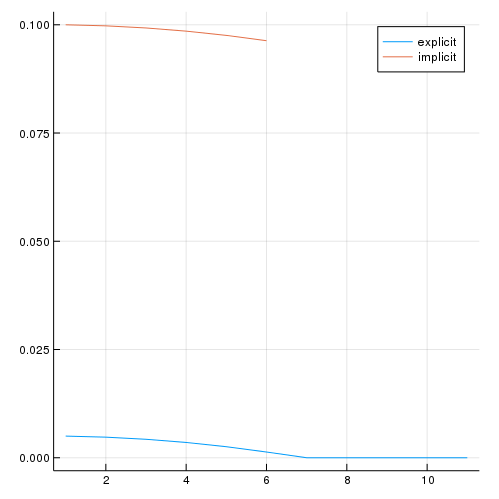

In [43]:
ts = cumsum([Δt for i in 1:N]);
j = 7
plot(traj_exp[j,:],label="explicit")
plot!(traj_imp[j,:],label="implicit")